### <b> Trabalho Final - Inteligência Computacional Aplicada (TIP7077) </b>
#### <b> Aluno: Carlos Eduardo Sousa Lima </b>
#### <b> Prof. Guilherme de Alencar Barreto </b>
***

#### <b>Questão 01 - Classificação de Padrões - MNIST database of handwritten digits </b>

<div style='text-align: justify;'>
As classes e funções apresentadas no bloco de código abaixo foram comuns a todos os classificadores implementados. Nelas, estão implementadas a leitura dos dados, adequação da codificação do vetor de saída (alvo) e normalização dos dados. A seguir, cada uma delas é melhor descrita:
</div>

- MNIST_data:<br>
    <div style='text-align: justify;'>
    
    Essa classe foi criada para conter as funções de aquisição dos dados de treino <b>get_train_data()</b> e dados de teste <b>get_test_data()</b>. Essas funções utilizam a biblioteca mnist (#https://pypi.org/project/python-mnist/#description), a qual, a partir dos dados obtidos em http://yann.lecun.org/exdb/mnist/index.html, descomprime e transforma-os em um objeto Numpy Array (np.array). Cada uma dessas funções retornam dois objetos np.array, um com os dados de entrada e o outro com seus respectivos labels. Os dados de entrada são retornados de forma vetorizada, ou seja, a matriz $28{\times}28$ é empilhada dando origem a um vetor $784{\times}1$. Os labels são o valor inteiro entre 0 e 9 que esse vetor representa.

    Cabe destacar que a base de dados de treino possuem 60.000 elementos e a de teste 10.000 elementos. Dessa forma, os dados de entrada formam uma matriz $60.000{\times}738$, para a base de treino, e $10.000{\times}738$, para a base de teste. Os labels, por sua vez, forma um vetor de $60.000{\times}1$, para a base de treino, e $10.000{\times}1$, para a base de teste</div>

    <div style='text-align: justify;' class="alert alert-block alert-info">
    
    Nota-se que cada elemento representa uma linha e suas características são ordenadas ao longo de suas colunas, o que diverge da ordenação empregada ao longo da disciplina. Optou-se por manter essa ordenação, assim, algumas operações matriciais podem apresentar uma ordem contrária à apresentada nas notas de aula, por exemplo:

    $\vec{y} = \tilde{W} \cdot \vec{x}$ (notas de aula)<br> 
    $\vec{y} = \vec{x} \cdot \tilde{W}$ (seguindo a notação adotada no trabalho)
    </div>


- one_hot_enconding():
    <div style='text-align: justify;'>
        
    Essa função altera o formato do vetor labels. Para cada elemento da base de dados de entrada do MNIST, seja a de treino ou de teste, existirá um label que representará o valor associado a esse elemento da base de dados. Tomando como exemplo os dados de treino, sua base de dados terá dimensão $60.000{\times}738$, visto que o procedimento de obtenção dos dados retorna esses dados de forma vetorizada. No caso dos seu respectivo vetor de label ($\vec{y}$), ele terá dimensão $60.000{\times}1$.

    Os possíveis valores de cada um dos elementos contidos no vetor de labels são representados por $x \in [0,9]$, tal que $x \in \Z$. A função aqui descrita, portanto, cria uma nova codificação para os labels baseada na codificação one-hot. Como $x$ pode assumir 10 valores (classes), cada elemento do vetor de labels dará origem a um vetor de cardinalidade igual 10. Portanto, após a aplicação dessa função, o vetor de label $\vec{y}$ passará a ter dimensão $60.000{\times}10$, para a base de treino, e $10.000{\times}10$, para a base de teste. 

    Esse vetor terá valor igual a 1 no índice que coincide com o valor representando no respectivo elemento do vetor de labels original, nos demais índices receberá o valor 0. Exemplificando, após a utilização da função one_hot_enconding(): <br>
    
    - $0 \rightarrow [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]$ <br>
    - $1 \rightarrow [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]$ <br>
    - $ \,\vdots \rightarrow \quad\quad\quad\quad\,\, \vdots$ <br>
    - $9 \rightarrow [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]$ <br>
    
    A utilização dessa codificação é interessante, pois assume que os vetores que representam cada classe são ortogonais entre si, ou seja, mutuamente exclusivos. 
    </div>


- norm_data():
    <div style='text-align: justify;'>

    A MNIST *database of handwritten digits* consiste na representação matricial de imagens de caracteres cursivos. Nessa representação, utiliza-se matrizes quadradas de dimensão $28{\times}28$, ou seja, cada imagem contém 784 pixels. Em cada um desses pixels, representasse uma tonalidade de cinza, considerando uma escala em que zero é totalmente branco e 255 totalmente preto.

    Como supracitado, cada uma dessas matrizes de dados são vetorizadas nas presente analises, dando origem a um vetor de dimensão $1{\times}p$. Agrupando esses vetores em linhas, obtém-se a matriz de dados de dimensão $n{\times}p$ utilizada nesse trabalho, sendo $n$ o número de imagens disponibilizadas para treino ou teste e $p = 784$. 

    A função nomr_data() atua normalizando os valores da escala de tons de cinza associados aos pixels das imagens de caracteres cursivos. Em outras palavras, para cada $n$ elemento da matriz de dados, seja de treino ou de teste, essa função varia intervalo de variação dos valores de $[0,255]$ para $[0,1]$. O processo de normalização é amplamente recomendado para algoritmos de classificação baseado em aprendizado, pois dados de entrada com elevados valores, ou que suas variáveis apresentem grandes diferença na magnitude dos seus valores, podem prejudicar o processo de aprendizado. Para normalização desses dados, adotou-se a seguinte equação:

    $$
        x^{norm}_{j} = \frac{x_{j} - x^{max}_{j}}{x^{max}_{j} - x^{min}_{j}}
    $$
    </div>
    


    


<p style="page-break-after:always;"></p>

In [3]:
import time
import numpy as np
from mnist import MNIST #https://pypi.org/project/python-mnist/#description
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from collections import namedtuple
import warnings
warnings.filterwarnings("ignore")

class MNIST_data():

    def __init__(self):
        pass
    
    def get_train_data():
        
        mndata = MNIST("./")
        mndata.gz = True
        x, y = mndata.load_training()

        return (np.array(x), np.array(y))
    
    def get_test_data():
        
        mndata = MNIST("./")
        mndata.gz = True
        x, y = mndata.load_testing()

        return (np.array(x), np.array(y))

def one_hot_enconding(y, n):

    y_enc = np.zeros((y.shape[0], n))
    for i in range(y.shape[0]):
        y_enc[i, y[i]] = 1

    return y_enc

def norm_data(df):
    df_std = np.zeros(df.shape)

    for i in range(df.shape[0]):
        # df_std[i,:] = (df[i,:] - df[i,:].mean())/(df[i,:].std(ddof = std_ddof))
        df_std[i,:] = (df[i,:] - df[i,:].min())/(df[i,:].max() - df[i,:].min())
    return df_std

##### Avaliando o posto das matrizes dos dados de treino (X) e dados de teste (X_test)

In [220]:
X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
if np.linalg.matrix_rank(X) == min(X.shape):
    print("Dados de entrada (X) - Matriz de Posto Completo\n")
else:
    print("Dados de entrada (X) - Matriz de Posto Incompleto\n")
if np.linalg.matrix_rank(X_test) == min(X_test.shape):
    print("Dados de entrada (X_test) - Matriz de Posto Completo\n")
else:
    print("Dados de entrada (X_test) - Matriz de Posto Incompleto\n")


Dados de entrada (X) - Matriz de Posto Incompleto

Dados de entrada (X_test) - Matriz de Posto Incompleto



##### Classificador Linear de Mínimos Quadrados

In [3]:
# O código está utilizando a orientação nxp
# n é o número de amostras, p o número de característica
# As operações matriciais apresentam ordem contrária ao apresentando nas notas de aula
# Y = W*X (Nota de Aula) - Y = X*W (Presente Código)
def LSM_Class(X, Y, X_test, Y_test, Nr):
    Nr = 5
    tx_ok = np.zeros(Nr)
    tic = time.perf_counter()
    for r in range(Nr):
        rand_index = np.random.permutation(X.shape[0])
        X = X[rand_index,:]
        Y = Y[rand_index,:]

        if X.shape[0] != X.shape[1]:
            W = np.linalg.lstsq(X,Y)[0]
        else:
            W = np.linalg.solve(X,Y)[0]


        Y_mod = np.dot(X_test, W)
        count_ok = 0

        for j in range(Y_mod.shape[0]):
            if Y_mod[j,:].argmax() == Y_test[j,:].argmax():
                count_ok += 1
        
        tx_ok[r] = count_ok/Y_mod.shape[0]
        print("Rodada {} - Taxa de Acerto = {:.2%}".format(r+1, tx_ok[r]))

    toc = time.perf_counter()
    
    print("\nTaxa de acerto Média = {:.2%}".format(tx_ok.mean()))
    print("Taxa de erro Média = {:.2%}".format(1-tx_ok.mean()))
    print("Melhor Taxa de Acerto = {:.2%}".format(tx_ok.max()))
    print("Pior Taxa de Acerto = {:.2%}".format(tx_ok.min()))
    print("Desv. Pad. Taxa de Acerto = {:.2%}".format(tx_ok.std()))

    return("Tempo de Calibração e Validação para {} rodadas = {} segundos".format(Nr, round(toc-tic, 2)))
    

In [4]:
X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

LSM_Class(X, Y, X_test, Y_test, 5)

Rodada 1 - Taxa de Acerto = 85.30%
Rodada 2 - Taxa de Acerto = 85.34%
Rodada 3 - Taxa de Acerto = 85.31%
Rodada 4 - Taxa de Acerto = 85.28%
Rodada 5 - Taxa de Acerto = 85.33%

Taxa de acerto Média = 85.31%
Taxa de erro Média = 14.69%
Melhor Taxa de Acerto = 85.34%
Pior Taxa de Acerto = 85.28%
Desv. Pad. Taxa de Acerto = 0.02%


'Tempo de Calibração e Validação para 5 rodadas = 25.28 segundos'

<div style='text-align: justify;'>
    
De acordo com LeCun *et al.* (1998), o classificador linear baseado em uma rede neural de uma camada (*1-layer NN*) obteve uma taxa de erro de 12.00% com a base de dados de teste, considerando nenhum pré-processamento desses dados.

O Classificador Linear de Mínimos Quadrados (CLMQ), por sua vez, apresenta um desempenho similar, com uma taxa de erro média de 14.68%. O desempenho desse classificador foi considerado satisfatório e evidencia que esse problema de classificação pode ser resolvido satisfatoriamente por uma superfície de decisão linear, ou seja, um problema linearmente separável.

Destaca-se que a operação para determinação da matriz $\tilde{W}$ utilizou o método de eliminação de Gauss, não sendo necessário a inversão explícita de $\tilde{X}\tilde{X}^{T}$. Como apresentado, as matrizes de dados de entrada para treino e teste possuem posto incompleto, logo haveria problema nessa inversão explícita supracitada.

Destaca-se, também, que o método de eliminação de Gauss possui um menor custo de processamento, sendo eficiente para dados de alta dimensão, como os utilizados no presente trabalho.

<div>

<div style='text-align: justify;'>
<font size="2.5">
LeCu, Y.; Bottou, L.; Bengio, Y. and Haffner, P. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.
</font>
<div>

***

##### Perceptron Logístico

In [11]:
def act_fun(u, fun):
    action_fun = namedtuple("act_fun", ["f", "df"])
    if fun == "step":
        u[np.where(u >= 0)] = 1
        u[np.where(u < 0)] = 0
        du = np.nan
    elif fun == "tanh":
        u = np.array(list(map(lambda x: (1-np.exp(-x))/(1+np.exp(-x)), u)))
        du = 0.5*(1-np.power(u,2)) + 0.05
    elif fun == "log":
        u = np.array(list(map(lambda x: 1/(1+np.exp(-x)), u)))
        du = u*(1-u) + 0.05
    return (action_fun(f = u, df = du))

def Hardamad_Prod(a, b):
    
    prod = np.array([np.multiply(x,y) for x, y in zip(a,b)])

    return prod

def PS (X, Y, X_test, Y_test, eta, Nr, Ne, fun_type, mom):
#Função que treina e valida a Perceptron Simples 
    tx_ok = np.empty((Nr))
    best_run = {"Acc": 0, "EQM": 0, "W": 0}
    worst_run = {"Acc": 1, "EQM": 0, "W": 0}
    EQM_ep = np.empty(0)

    if fun_type == "tanh":
        #codificação da saída fica -1 e 1 para tangente hiperbólica
        Y[Y == 0] = -1
        Y_test[Y == 0] = -1

    tic = time.perf_counter()
    
    for r in range(Nr):
        #Não embaralhei a cada rodada, pois os dados de treino sempre serão X e Y
        #Assim, como não haverá split do conjunto em dados de treino e teste
        #Decidi embaralhar só dentro de cada época
        #Inicialização aleatória dos pesos
        ###Treino###
        W = np.random.rand(Y.shape[1], X.shape[1]+1)
        W_old = W.copy()
        for ep in range(Ne):
            #Embaralhamento da matriz de dados saída
            rand_index = np.random.permutation(X.shape[0])
            X = X[rand_index, :]
            Y = Y[rand_index, :]
            EQM = 0
            
            for i in range(X.shape[0]):
                x = np.append(-1, X[i,:]) #add bias
                U = np.dot(W, x)
                y, dy = act_fun(U, fun_type)
                err = Y[i,:] - y
                
                EQM = EQM + 0.5*np.power(err, 2).sum()
                
                x = np.expand_dims(x, 1)
                
                Di = np.expand_dims(Hardamad_Prod(err, dy), 1)
                
                W_aux = W.copy()

                W = W + eta*np.dot(Di, x.T) + mom*(W - W_old)
                
                W_old = W_aux.copy()
            
            EQM_ep = np.append(EQM_ep, EQM/X.shape[0])

        ###Validação###
        count = 0
        for j in range(X_test.shape[0]):
            x = np.append(-1, X_test[j,:])
            U = np.dot(W, x)
            y = act_fun(U, fun_type).f

            if Y_test[j,:].argmax() == y.argmax():
                count += 1

        tx_ok[r] = count/X_test.shape[0]

        if tx_ok[r] > best_run["Acc"]:
            best_run["Acc"], best_run["EQM"], best_run["W"] = (tx_ok[r], EQM_ep, W)


        if tx_ok[r] < worst_run["Acc"]:
            worst_run["Acc"], worst_run["EQM"], worst_run["W"] = (tx_ok[r], EQM_ep, W)
        
        print("Rodada {} - Taxa de acerto = {:.2%}".format(r+1, tx_ok[r]))
    toc = time.perf_counter()

    EQM_ep = EQM_ep.reshape((Nr,Ne))
    fig, ax = plt.subplots()
    for i in range(EQM_ep.shape[0]):
        ax.plot(EQM_ep[i,:], label = "Rodada {}".format(i+1))
    ax.legend()
    ax.set_ylabel("EQM")
    ax.set_xlabel("epochs")

    print("\nTaxa de acerto Média = {:.2%}".format(tx_ok.mean()))
    print("Taxa de erro Média = {:.2%}".format(1-tx_ok.mean()))
    print("Melhor Taxa de Acerto = {:.2%}".format(tx_ok.max()))
    print("Pior Taxa de Acerto = {:.2%}".format(tx_ok.min()))
    print("Desv. Pad. Taxa de Acerto = {:.2%}".format(tx_ok.std()))

    return("Tempo de Calibração e Validação para {} rodadas = {} segundos".format(Nr, round(toc-tic, 2)))

Rodada 1 - Taxa de acerto = 91.88%
Rodada 2 - Taxa de acerto = 91.46%
Rodada 3 - Taxa de acerto = 91.73%
Rodada 4 - Taxa de acerto = 91.09%
Rodada 5 - Taxa de acerto = 91.47%

Taxa de acerto Média = 91.53%
Taxa de erro Média = 8.47%
Melhor Taxa de Acerto = 91.88%
Pior Taxa de Acerto = 91.09%
Desv. Pad. Taxa de Acerto = 0.27%


'Tempo de Calibração e Validação para 5 rodadas = 969.36 segundos'

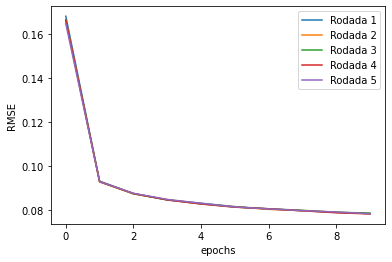

In [12]:
# O código está utilizando a orientação nxp
# n é o número de amostras, p o número de característica
# As operações matriciais apresentam ordem contrária ao apresentando nas notas de aula
# Y = W*X (Nota de Aula) - Y = X*W (Presente Código)

X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

#PS (X, Y, X_test, Y_test, eta, Nr, Ne, fun_type)
PS(X, Y, X_test, Y_test, eta = 0.01, Nr = 5, Ne = 10, fun_type = "log", mom = 0.85)

<div style='text-align: justify;'>
    
De acordo com LeCun *et al.* (1998), o classificador linear baseado em uma rede neural de uma camada (*1-layer NN*) obteve uma taxa de erro de 12.00% com a base de dados de teste, considerando nenhum pré-processamento desses dados. A taxa de erro desse classificador será usada como referência comparativa do classificador baseado na rede Perceptron Logístico.

A rede perceptron logístico implementada para classificação dessa mesma base de dados do MNIST apresentou uma taxa de erro média para 5 rodadas igual a 8.47%, taxa de erro abaixo da referência comparativa utilizada. Apesar do classificador linear apresentar um desempenho satisfatório na classificação dos dados de teste, a inserção de uma não-linearidade suave à função de ativação da rede perceptron resulta numa melhoria desse desempenho.

Em cada uma dessas rodadas, o treinamento dessa rede neural contabilizou 10 épocas. Para cada uma dessas épocas, embaralhou-se os dados de treinamento, evitando overfitting a esses dados. A base de treino contém 60.000 elementos, assim, atualizou-se a matriz de peso 600.000. A taxa de aprendizado utilizada fio igual a $\eta = 0.01$ e a taxa de momento igual a $m = 0.85$. A taxa de momento, ou termo de momento, é utilizado para tornar mais estável o processo de utilização dos pesos.

A atualização desses pesos utilizou a regra delta generalizada. Essa regra, utiliza o gradiente local do erro do i-ésimo neurônio $(\delta_{i})$, obtido pelo produtor de Hardamad entre o erro do i-ésimo neurônio $(e_{i})$ e a derivada da função de ativação da saída do i-ésimo neurônio $(\phi_{i}')$ $(\delta_{i} = e_{i} \circ \phi_{i}')$. Entende-se que essa derivada atua como moduladora do erro, com valores altos de erro gerando valores pequenos de derivada, conferindo uma estabilidade adicional no processo de aprendizado ao longo das épocas. Estabilidade, essa, maior que o da regra LMS convencional.

No tocanto a essa estabilidade, é digno de nota a adição de $0,05$ à derivada da função de ativação. Como discutido ao longo das aulas, a modulação de $(e_{i})$ feita por $(\phi_{i}')$ pode ocasionar a paralisia da rede neural, não modificando a matriz de pesos quando erros grandes surgirem. Além da inicialização da matriz de pesos com valores pequenos, foi nos apresentado a solução *Ad-Hoc* de adicionar esse pequeno elemento à derivada da função de ativação.
<div>


<div style='text-align: justify;'>
<font size="2.5">
LeCu, Y.; Bottou, L.; Bengio, Y. and Haffner, P. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.
</font>
<div>

***

##### PCA

In [13]:
def PCA (x_train, x_test, compress, spt_point):
    #x dimensão pxn 
    #p número de variáveis de cada amostra e n número de amostras

    #Centralizando os dados
    x_train = x_train -  x_train.mean(axis = 1, keepdims = True) 
    x_test = x_test - x_test.mean(axis = 1, keepdims = True)
    
    cov_x = np.cov(x_train)

    u, l, v = np.linalg.svd(cov_x)

    ve = np.cumsum(l)/l.sum()

    if compress == True:

        sel_index = np.where(ve <= spt_point)
        v = v[:,sel_index[0]]

        fig, ax = plt.subplots()
        ax.plot(ve)
        ax.plot(ve[sel_index], c = "red", label = "Dados Selecionados")
        ax.set_ylabel("Variância Explicada Acumulada")
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
        ax.legend()

        z = np.dot(v.T, x_train)
        z_test = np.dot(v.T, x_test)
    else:
        z = np.dot(v.T, x_train)
        z_test = np.dot(v.T, x_test)
    #Transpor para que Z saia no formato utilizado nos códigos dos classificados
    #formato nxp, n número de amostras e p número de características
    return (z.T, z_test.T)


##### PCA + Classificador Linear de Mínimos Quadrados

Dimensão da matriz de dados de treino antes do PCA: (60000, 784)
Dimensão da matriz de dados de teste antes do PCA: (10000, 784)
Dimensão da matriz de dados de treino após PCA (95% da variância): (60000, 153)
Dimensão da matriz de dados de teste após PCA (95% da variância): (10000, 153)

Rodada 1 - Taxa de Acerto = 82.09%
Rodada 2 - Taxa de Acerto = 82.09%
Rodada 3 - Taxa de Acerto = 82.09%
Rodada 4 - Taxa de Acerto = 82.12%
Rodada 5 - Taxa de Acerto = 82.09%

Taxa de acerto Média = 82.10%
Taxa de erro Média = 17.90%
Melhor Taxa de Acerto = 82.12%
Pior Taxa de Acerto = 82.09%
Desv. Pad. Taxa de Acerto = 0.01%


'Tempo de Calibração e Validação para 5 rodadas = 5.12 segundos'

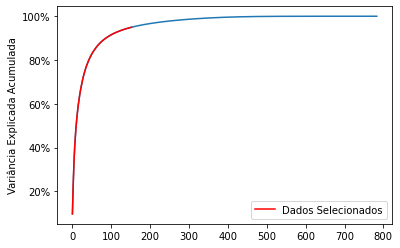

In [9]:
X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()

Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

print("Dimensão da matriz de dados de treino antes do PCA: {}".format(X.shape))
print("Dimensão da matriz de dados de teste antes do PCA: {}".format(X_test.shape))
#A base de dados do MNIST é disponibilizada no seguinte padrão nxp
#n é o número de amostras, p o número de característica
#Para aplicação do PCA, deve-se transpor essa matriz para que se torne pxn

X, X_test = PCA(X.T, X_test.T, compress = True, spt_point = 0.95)
print("Dimensão da matriz de dados de treino após PCA (95% da variância): {}".format(X.shape))
print("Dimensão da matriz de dados de teste após PCA (95% da variância): {}\n".format(X_test.shape))

LSM_Class(X, Y, X_test, Y_test, 5)

##### PCA + Perceptron Logístico

Dimensão da matriz de dados de treino antes do PCA: (60000, 784)
Dimensão da matriz de dados de teste antes do PCA: (10000, 784)
Dimensão da matriz de dados de treino após PCA (95% da variância): (60000, 153)
Dimensão da matriz de dados de teste após PCA (95% da variância): (10000, 153)

Rodada 1 - Taxa de acerto = 88.82%
Rodada 2 - Taxa de acerto = 88.72%
Rodada 3 - Taxa de acerto = 88.68%
Rodada 4 - Taxa de acerto = 88.86%
Rodada 5 - Taxa de acerto = 88.87%

Taxa de acerto Média = 88.79%
Taxa de erro Média = 11.21%
Melhor Taxa de Acerto = 88.87%
Pior Taxa de Acerto = 88.68%
Desv. Pad. Taxa de Acerto = 0.08%


'Tempo de Calibração e Validação para 5 rodadas = 866.46 segundos'

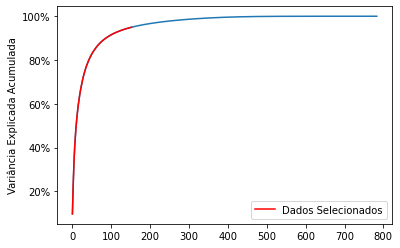

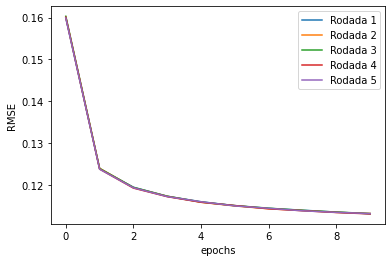

In [14]:
# O código está utilizando a orientação nxp
# n é o número de amostras, p o número de característica
# As operações matriciais apresentam ordem contrária ao apresentando nas notas de aula
# Y = W*X (Nota de Aula) - Y = X*W (Presente Código)

X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

print("Dimensão da matriz de dados de treino antes do PCA: {}".format(X.shape))
print("Dimensão da matriz de dados de teste antes do PCA: {}".format(X_test.shape))
#A base de dados do MNIST é disponibilizada no seguinte padrão nxp
#n é o número de amostras, p o número de característica
#Para aplicação do PCA, deve-se transpor essa matriz para que se torne pxn

X, X_test = PCA(X.T, X_test.T, compress = True, spt_point = 0.95)
print("Dimensão da matriz de dados de treino após PCA (95% da variância): {}".format(X.shape))
print("Dimensão da matriz de dados de teste após PCA (95% da variância): {}\n".format(X_test.shape))

#PS (X, Y, X_test, Y_test, eta, Nr, Ne, fun_type)
PS(X, Y, X_test, Y_test, eta = 0.01, Nr = 5, Ne = 10, fun_type = "log", mom = 0.85)

<div style='text-align: justify;'>

A *Principal Component Analysis* (PCA) foi utilizada para remoção de redudância dos dados de treino e dados de teste. Entende-se por redundância, a covariância entre as variáveis que descrevem os elementos das bases de dados (treino e teste). Dessa forma, a matriz de covariância dos dados transformados é uma matriz diagonal.

Além da remoção das redundâncias, a PCA permite redução de dimensionalidade dessas bases de dados, mantendo apenas uma determinada variância explicada acumulada. Na presente aplicação, a redução de dimensionalidade aplicada manteve 95% da variância explicada dessas bases de dados. Nessa redução, o número de variáveis de cada elemento dos dados de treino e teste passou de 784 para 153, assim as matrizes de dados de treino e teste tiveram, respectivamente as seguintes alterações em suas dimensões: $(60.000 \times 784) \to (60.000 \times 153)$ e $(10.000 \times 784) \to (10.000 \times 153)$.

Após a aplicação do PCA nos dados de treino e teste, o desempenho dos classificadores Linear de Mínimos Quadrados e Percepton Logístico tiveram, respectivamente, uma taxa de erro médio (5 rodadas) de 17,90% e 11,21%. Observa-se, na devida ordem, um aumento de +3,22% e +2,74% na taxa de erro médio desses classificadores. 

Apesar dessa piora no desempenho dos classificadores, é digno de nota a melhoria nos seus tempos de execução. O classificador de mínimo quadrados apresentou, para 5 rodadas, um tempo de execução de 25,28 segundos utilizando a base de dados original e 5,12 segundos utlizando a base de dados transformada pelo PCA; uma redução de 20,16 segundos, ou seja, uma redução de quase 80% no tempo de execução. Já para o perceptron logístico, também para 5 rodadas, o tempo de execução foi de 969,36 segundos para 866,46 segundos, uma redução de 102,9 segundos (-10,62%).

Vale ressaltar, também, a redução do desvio padrão da taxa de acerto com a aplicação do PCA para o Perceptron logístico, reduzindo de 0.27% para 0.08%. 

<div>

<div style='text-align: justify;'>
<font size="2.5">
LeCu, Y.; Bottou, L.; Bengio, Y. and Haffner, P. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.
</font>
<div>

***

##### MLP

In [4]:
def act_fun(u, fun):
    action_fun = namedtuple("act_fun", ["f", "df"])
    if fun == "step":
        u[np.where(u >= 0)] = 1
        u[np.where(u < 0)] = 0
        du = np.nan
    elif fun == "tanh":
        u = np.array(list(map(lambda x: (1-np.exp(-x))/(1+np.exp(-x)), u)))
        du = 0.5*(1-np.power(u,2)) + 0.05
    elif fun == "log":
        u = np.array(list(map(lambda x: 1/(1+np.exp(-x)), u)))
        du = u*(1-u) + 0.05
    return (action_fun(f = u, df = du))

def Hardamad_Prod(a, b):
    
    prod = np.array([np.multiply(x,y) for x, y in zip(a,b)])

    return prod

def weight_matrix(dict_q):
    #Cria as matrizes de peso sinapticos
    #Mantendo a compatibilidade entre as dimensões de forma que viabiliza as operações matriciais

    W = {}
    for i in range(len(dict_q)):
        if i == 0:
        #camada oculta
            W[i] = np.random.rand(dict_q[i], X.shape[1] + 1)*0.01
        else:
        #Demais camadas, se houver
            W[i] = np.random.rand(dict_q[i], dict_q[i-1] + 1)*0.01
    return (W)
    
def MLP(X, Y, X_test, Y_test, eta, Nr, Ne, mon, fun_type):
    
    tx_ok = np.empty((Nr))
    EQM_ep = np.empty(0)
    fun_type = "log"

    if fun_type == "tanh":
        #codificação da saída fica -1 e 1 para tangente hiperbólica
        Y[Y == 0] = -1
        Y_test[Y == 0] = -1

    #Arquitetura da MLP (p, q, c) - 1 Camada Ocula
    #p = entradas, q = neuronicos oculos, c = neuronios de saída
    #dict_q Número de neuronios em cada camada

    dict_q = {
        0: 89,
        1: Y.shape[1]
    }

    tic = time.perf_counter()
    for r in range(Nr):
        W = weight_matrix(dict_q)
        W_old = W.copy()

        for ep in range(Ne):
            rand_index = np.random.permutation(X.shape[0])
            X = X[rand_index,:]
            Y = Y[rand_index,:]
            EQM = 0

            for i in range(X.shape[0]):
                x = np.append(-1, X[i,:])
                U1 = np.dot(W[0], x)
                z, dz = act_fun(U1, fun_type)

                z = np.append(-1, z)
                U2 = np.dot(W[1], z)
                y, dy = act_fun(U2, fun_type)

                err = Y[i,:] - y

                EQM = EQM + 0.5*np.power(err,2).sum()

                err = np.expand_dims(Hardamad_Prod(err, dy),  1)

                x = np.expand_dims(x,1)
                z = np.expand_dims(z,1)

                W_aux = W.copy()

                W[0] = W[0] + eta*np.dot(Hardamad_Prod(dz, np.dot(
                    W[1][:,1:].T, err)), x.T) + mon*(W[0] - W_old[0])
                
                W[1] = W[1] + eta*np.dot(err, z.T) + mon*(W[1] - W_old[1])

                W_old = W_aux.copy()

            EQM_ep = np.append(EQM_ep, EQM/X.shape[0])

        count = 0
        for j in range(X_test.shape[0]):
            x = np.append(-1, X_test[j,:])
            U1 = np.dot(W[0], x)
            z = act_fun(U1, fun_type).f
            z = np.append(-1, z)
            U2 = np.dot(W[1], z)
            y = act_fun(U2, fun_type).f

            if Y_test[j,:].argmax() == y.argmax():
                count += 1

        tx_ok[r] = count/X_test.shape[0]
        print("Rodada {} - Taxa de acerto = {:.2%}".format(r+1, tx_ok[r]))
    toc = time.perf_counter()

    EQM_ep = EQM_ep.reshape((Nr,Ne))
    fig, ax = plt.subplots()
    for i in range(EQM_ep.shape[0]):
        ax.plot(EQM_ep[i,:], label = "Rodada {}".format(i+1))
    ax.legend()
    ax.set_ylabel("EQM")
    ax.set_xlabel("epochs")

    print("\nTaxa de acerto Média = {:.2%}".format(tx_ok.mean()))
    print("Taxa de erro Média = {:.2%}".format(1-tx_ok.mean()))
    print("Melhor Taxa de Acerto = {:.2%}".format(tx_ok.max()))
    print("Pior Taxa de Acerto = {:.2%}".format(tx_ok.min()))
    print("Desv. Pad. Taxa de Acerto = {:.2%}".format(tx_ok.std()))

    return("Tempo de Calibração e Validação para {} rodadas = {} segundos".format(Nr, round(toc-tic, 2)))



Rodada 1 - Taxa de acerto = 96.31%
Rodada 2 - Taxa de acerto = 96.62%
Rodada 3 - Taxa de acerto = 96.34%
Rodada 4 - Taxa de acerto = 96.74%
Rodada 5 - Taxa de acerto = 96.51%

Taxa de acerto Média = 96.50%
Taxa de erro Média = 3.50%
Melhor Taxa de Acerto = 96.74%
Pior Taxa de Acerto = 96.31%
Desv. Pad. Taxa de Acerto = 0.16%


'Tempo de Calibração e Validação para 5 rodadas = 2007.28 segundos'

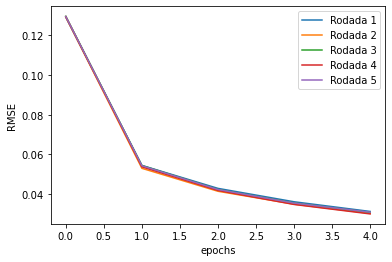

In [5]:
X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

#LP(X, Y, X_test, Y_test, eta, Nr, Ne, mon, fun_type)
MLP (X, Y, X_test, Y_test, eta = 0.05, Nr = 5, Ne = 5, mom = 0.75, fun_type = "log")

<div style='text-align: justify;'>
    
De acordo com LeCun *et al.* (1998), o classificador *2-layer NN, 300 hidden units, mean square error* obteve uma taxa de erro de 4.7% com a base de dados de teste, considerando nenhum pré-processamento desses dados. A taxa de erro desse classificador será usada como referência comparativa do classificador baseado na rede MLP .

A rede MLP implementada conta com apenas uma camada oculta, possuindo uma arquitetura do tipo $(p,q,c)$, sendo $p = 784$, $q = 89$ e $c = 10$. O número de neurônio da camada ocula $(q)$ foi determinado com a Regra da Raiz Quadrada $q = \sqrt{p \times c}$. A função de ativação utilizada foi a logística.

O número de rodadas foi igual a 5. Para a etapa de treinamento da rede, considerou-se 5 épocas, na qual os dados eram embaralhados no inicio da execução de cada época evitando overfitting aos dados de treino. A taxa de aprendizado utilizada foi igual a $\eta = 0.05$ e a taxa de momento igual a $m = 0.75$. A taxa de momento, ou termo de momento, é utilizado para tornar mais estável o processo de utilização dos pesos. A taxa de aprendizado e o fator de momento foram determinados empiricamente, variando seu valor até se observar um comportamento estável e de rápida redução do Erro Quadrático Médio (EQM) ao longo das épocas.

A taxa de erro médio da rede MLP implementada foi de 3,50%, indicando um ótimo desempenho desse classificador, inclusive melhor que a referência comparativa utilizada. A melhoria do desempenho da MLP de uma camada oculta em relação ao Perceptron Logístico pode ser atribuído a capacidade dessa primeira delimitar duas superfícies decisórias. 

Uma das principais vantagens das redes MLP em relação as redes Perceptron é a capacidade resolver problemas de classificação não lineares. Todavia, há um custo computacional mais elevado. A rede MLP implementada no presente trabalho, para 5 rodadas de 5 épocas teve um tempo de treinamento e validação igual a 2007,28 segundos, enquanto a Perceptron Logístico, para 5 rodadas e 10 épocas, apresentou um tempo de treinamento e validação igual a 969,36 segundos. Levanta-se esse ponto, pois deve-se avaliar se a melhoria no desempenho justifica o custo computacional empregado. 

No caso, temos cerca de um erro médio de 8,47% para a Perceptron Logística e um erro médio de 3,50% para a MLP com uma camada oculta. Nesse caso, julga-se que o custo computacional mais elevado da MLP é justificado pela melhoria no desempenho da classificação.

No tocante à referência comparativa utilizada, LeCun *et al.* (1998) destacam que obtiveram uma taxa de erro médio de 3,6% quando utilizaram distorções artificiais para gerar mais dados de treino para a *2-layer NN, 300 hidden units*, valor próximo ao obtido com a MLP de 1 camada oculta implementada. Portanto supõe-se que o melhor desempenho da MLP apresentada possa estar relacionado ao número de épocas considerado, uma vez que os dados de treino são apresentados cinco vezes de forma embaralhada. Além disso, destaca-se também os diferentes números de neurônios da camada oculta, uma vez que a quantidade de neurônios dessa(s) camada(s) pode(m) prejudicar a capacidade de generalização da rede neural quando em excesso.


<div>

<div style='text-align: justify;'>
<font size="2.5">
LeCu, Y.; Bottou, L.; Bengio, Y. and Haffner, P. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.
</font>
<div>

***

##### PCA + MLP

Dimensão da matriz de dados de treino antes do PCA: (60000, 784)
Dimensão da matriz de dados de teste antes do PCA: (10000, 784)
Dimensão da matriz de dados de treino após PCA (95% da variância): (60000, 153)
Dimensão da matriz de dados de teste após PCA (95% da variância): (10000, 153)
Rodada 1 - Taxa de acerto = 87.08%
Rodada 2 - Taxa de acerto = 87.05%
Rodada 3 - Taxa de acerto = 87.13%
Rodada 4 - Taxa de acerto = 87.12%
Rodada 5 - Taxa de acerto = 87.27%

Taxa de acerto Média = 87.13%
Taxa de erro Média = 12.87%
Melhor Taxa de Acerto = 87.27%
Pior Taxa de Acerto = 87.05%
Desv. Pad. Taxa de Acerto = 0.08%


'Tempo de Calibração e Validação para 5 rodadas = 1522.55 segundos'

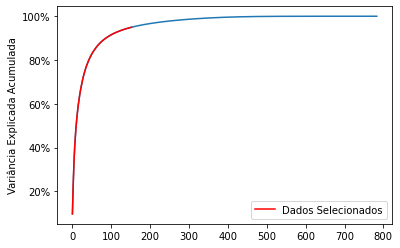

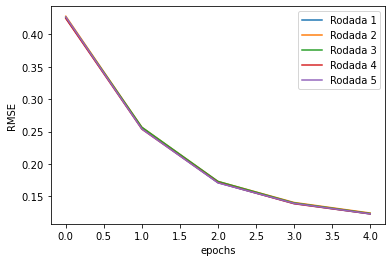

In [6]:
X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

print("Dimensão da matriz de dados de treino antes do PCA: {}".format(X.shape))
print("Dimensão da matriz de dados de teste antes do PCA: {}".format(X_test.shape))
#A base de dados do MNIST é disponibilizada no seguinte padrão nxp
#n é o número de amostras, p o número de característica
#Para aplicação do PCA, deve-se transpor essa matriz para que se torne pxn

X, X_test = PCA(X.T, X_test.T, compress = True, spt_point = 0.95)
print("Dimensão da matriz de dados de treino após PCA (95% da variância): {}".format(X.shape))
print("Dimensão da matriz de dados de teste após PCA (95% da variância): {}\n".format(X_test.shape))

#PS (X, Y, X_test, Y_test, eta, Nr, Ne, fun_type)
MLP (X, Y, X_test, Y_test, 0.01, 5, 5, 0.75, "log")


A aplicação do PCA+MLP seguiu as mesmas espeficiações já citadas. A redução de dimensionalidade nas bases de treino e teste também mantiveram 95% da Variância Explicada. As matrizes de dados de treino e teste tiveram, respectivamente as seguintes alterações em suas dimensões: $(60.000 \times 784) \to (60.000 \times 153)$ e $(10.000 \times 784) \to (10.000 \times 153)$.

O número de rodadas, número de épocas, taxa de aprendizagem, fator de momento, número de neurônios da camada oculta e toda as outras especificidades da MLP de 1 camada implementada foram mantidas, alterando apenas os dados de entrada que passaram a ser os dados transformados e com dimensionalidade reduzida oriundos da aplicação do PCA na base de dados original.

Observa-se que o desempenho da MLP de 1 camada oculta foi bastante prejudicado, com sua taxa de erro médio indo de 3,50% (sem PCA) para 12,87% (com PCA), inclusive apresentando desemepnho inferior ao obtido com PCA + Perceptron Logístico, que apresentou uma taxa de erro médio de 11,21%. Esse comportamento sugere que os dados transformados pela aplicação do PCA são melhor classificados com apenas um hiperplano.

É interessante notar que, da mesma forma que para a aplicação da PCA + Perceptron Logístico, o uso da PCA antes da aplicação da MLP de 1 camada oculta reduziu o desvio padrão da taxa de acerto de 0,16% (Sem PCA) para 0,08% (Com PCA).

Em relação ao tempo de calibração e validação para 5 rodadas reduziu de 2007,28 segundos (Sem PCA) para 1522,55 segundos (Com PCA), uma redução de 484,73 segundos. Essa redução, de cerca de 8 minutos, ocorre em troca de uma penalização considerável do desempenho da MLP de 1 camada oculta na classificação da base de dados de teste.


***

##### Ensemble (M = 25 Perceptrons Logísticos)

In [15]:
def act_fun(u, fun):
    action_fun = namedtuple("act_fun", ["f", "df"])
    if fun == "step":
        u[np.where(u >= 0)] = 1
        u[np.where(u < 0)] = 0
        du = np.nan
    elif fun == "tanh":
        u = np.array(list(map(lambda x: (1-np.exp(-x))/(1+np.exp(-x)), u)))
        du = 0.5*(1-np.power(u,2)) + 0.05
    elif fun == "log":
        u = np.array(list(map(lambda x: 1/(1+np.exp(-x)), u)))
        du = u*(1-u) + 0.05
    return (action_fun(f = u, df = du))

def Hardamad_Prod(a, b):
    
    prod = np.array([np.multiply(x,y) for x, y in zip(a,b)])

    return prod 

def bagging_sampler(x, y):
    baggin_index = np.random.randint(0, x.shape[0], size = x.shape[0])

    x = x[baggin_index,:]
    y = y[baggin_index,:]

    return (x,y)

def initialize_weights(shape, Number_machine):
    W = {}
    for i in range(Number_machine):
        W[i] = np.random.rand(shape[0], shape[1])
    return W

Dimensão da matriz de dados de treino antes do PCA: (60000, 784)
Dimensão da matriz de dados de teste antes do PCA: (10000, 784)
Dimensão da matriz de dados de treino após PCA (95% da variância): (60000, 153)
Dimensão da matriz de dados de teste após PCA (95% da variância): (10000, 153)

Rodada 1, Acerto do Ensemble = 89.10%
Rodada 2, Acerto do Ensemble = 89.02%
Rodada 3, Acerto do Ensemble = 89.07%
Rodada 4, Acerto do Ensemble = 88.95%
Rodada 5, Acerto do Ensemble = 89.06%
Tempo de Calibração e Validação para 5 rodadas = 17571.56 segundos


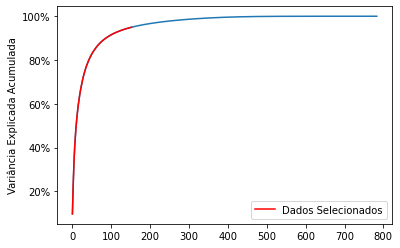

In [18]:
X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

print("Dimensão da matriz de dados de treino antes do PCA: {}".format(X.shape))
print("Dimensão da matriz de dados de teste antes do PCA: {}".format(X_test.shape))
#A base de dados do MNIST é disponibilizada no seguinte padrão nxp
#n é o número de amostras, p o número de característica
#Para aplicação do PCA, deve-se transpor essa matriz para que se torne pxn

X, X_test = PCA(X.T, X_test.T, compress = True, spt_point = 0.95)
print("Dimensão da matriz de dados de treino após PCA (95% da variância): {}".format(X.shape))
print("Dimensão da matriz de dados de teste após PCA (95% da variância): {}\n".format(X_test.shape))

eta = 0.01
mom = 0.85
Ne = 10
Nr = 5
Nm = 25 #Número de Máquinas do Ensemble
fun_type = "log"
tx_ok = np.empty((Nr))
EQM_ep = np.empty(0)

tic = time.perf_counter()
for r in range(Nr):
    count_m = np.full(Nm, np.nan) #contado para taxa de acerto de cada máquina
    W = initialize_weights(shape = (Y.shape[1], X.shape[1] + 1), Number_machine = Nm)
    W_old = W.copy()
    for m in range(Nm):
        #X_m e Y_m são as entradas do m-ésimo integrante do ensemble
        #A diversificação é feita através do Bagging, amostrador com repetição
        X_m, Y_m = bagging_sampler(X, Y)

        for e in range(Ne):
            #Embaralhamento para cada época
            rand_index = np.random.permutation(X_m.shape[0])
            X_m = X_m[rand_index,:]
            Y_m = Y_m[rand_index,:]
            EQM = 0
            for i in range(X_m.shape[0]):
                x = np.append(-1, X_m[i,:])
                U = np.dot(W[m], x)
                y, dy = act_fun(U, fun_type)
                err = Y_m[i,:] - y
                
                EQM = EQM + 0.5*np.power(err,2).sum()
                
                Di = np.expand_dims(Hardamad_Prod(err, dy), 1)
                x = np.expand_dims(x,1)
                
                #Atualiza os pesos da m-ésimo integrante do ensemble
                W_aux = W[m].copy()

                W[m] = W[m] + eta*np.dot(Di, x.T) + mom*(W[m] - W_old[m])

                W_old[m] = W_aux.copy()
        #Cálculo dos pesos para cada integrante do ensemble
        #Os integrantes do ensemble serão agregados através de uma média ponderada
        #A ponderação será dada pela taxa de acerto de cada integrante, calculada abaixo
        count = 0
        for j in range(X_test.shape[0]):
            x = np.append(-1, X_test[j,:])
            U = np.dot(W[m], x)
            y = act_fun(U, fun_type).f
            if Y_test[j,:].argmax() == y.argmax():
                count += 1

        count_m[m] = count/X_test.shape[0]
    
    count_ensemble = 0
    for j in range(X_test.shape[0]):
        num = 0
        for m in range(Nm):
            x = np.append(-1, X_test[j,:])
            U = np.dot(W[m], x)
            y = act_fun(U, fun_type).f
            num = num + y*count_m[m]
            #num - acumula o produto da saída por sua taxa de acerto
        y_m = num/count_m.sum()
        #y_m é a saída ponderada de cada integrante do ensemble
        if Y_test[j,:].argmax() == y_m.argmax():
            count_ensemble += 1
    print ("Rodada {}, Acerto do Ensemble = {:.2%}".format(r+1, count_ensemble/X_test.shape[0]))
    
toc = time.perf_counter()

print("Tempo de Calibração e Validação para {} rodadas = {} segundos".format(Nr, round(toc-tic, 2)))



<div style='text-align: justify;'>
    
De acordo com LeCun *et al.* (1998), o classificador *committee of 25 NN 784-800-10* obteve uma taxa de erro de 0,39% com a base de dados de teste, considerando nenhum pré-processamento desses dados. A taxa de erro desse classificador será usada como referência comparativa do classificador baseado no Ensemble de Perceptron Logístico. 
***

##### Ensemble (M = 25 MLPs)
Tendo em vista o tempo necessário para treinamento das MLPs acima apresentadas, optou-se pela utilização da biblioteca scikit-learn para realização do ensemble de 25 MLPs por ela ter um processamento mais otimizado.

In [6]:
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from glob import glob
import pickle
import os

def bagging_sampler(x, y):
    baggin_index = np.random.randint(0, x.shape[0], size = x.shape[0])

    x = x[baggin_index,:]
    y = y[baggin_index,:]

    return (x,y)

def make_ensemble(n_log, n_tanh, n_relu, q_list, eta, mom_rate):
    models = list()
    
    for i in range(n_log):
        n_q = np.random.choice(q_list)
        models.append((
            "{}_log_784_{}_10".format(i, n_q), 
            MLP(random_state = 1,
            hidden_layer_sizes = n_q,
            activation = "logistic",
            learning_rate = "constant",
            learning_rate_init = eta,
            momentum = mom_rate)))
        
    for i in range(n_tanh):
        n_q = np.random.choice(q_list)
        models.append((
            "{}_tanh_784_{}_10".format(i, n_q),
            MLP(random_state = 1,
            hidden_layer_sizes = n_q,
            activation = "tanh",
            learning_rate = "constant",
            learning_rate_init = eta,
            momentum = mom_rate)))
    
    for i in range(n_relu):
        n_q = np.random.choice(q_list)
        models.append((
            "{}_relu_784_{}_10".format(i, n_q),
            MLP(random_state = 1,
            hidden_layer_sizes = n_q,
            activation = "relu",
            learning_rate = "constant",
            learning_rate_init = eta,
            momentum = mom_rate)))

    return models

def train_models(x, y, models):
    
    for name, model in models:
        x_bag, y_bag = bagging_sampler(x,y)
        tic = time.perf_counter()
        model.fit(x_bag, y_bag)
        toc = time.perf_counter()
        pickle.dump(model, open("Ens_Trained_MLP/{}.pkl".format(name), "wb"))
        print("{} Treinado - Tempo = {:.2f} segundos".format(name, toc - tic))

    return "Todos os Membros Treinados"


X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)


Treinamento dos Membros do Ensemble

Após os modelos treinados, eles são salvos no formato "pkl" utilizando a biblioteca Pickle

In [7]:
tic = time.perf_counter()
models = make_ensemble(
            n_log = 10, n_tanh = 10, n_relu = 5,
            q_list = [70, 90, 400, 800],
            eta = 0.001, mom_rate = 0.9)

train_models(X, Y, models)
toc = time.perf_counter()
print("\n Tempo para treino dos {} membros do Ensemble = {:.2f} segundos".format(25, toc-tic))

0_log_784_800_10 Treinado - Tempo = 1175.26 segundos
1_log_784_90_10 Treinado - Tempo = 198.40 segundos
2_log_784_70_10 Treinado - Tempo = 206.23 segundos
3_log_784_70_10 Treinado - Tempo = 193.72 segundos
4_log_784_90_10 Treinado - Tempo = 209.91 segundos
5_log_784_400_10 Treinado - Tempo = 673.73 segundos
6_log_784_800_10 Treinado - Tempo = 1094.35 segundos
7_log_784_90_10 Treinado - Tempo = 188.04 segundos
8_log_784_800_10 Treinado - Tempo = 1046.28 segundos
9_log_784_400_10 Treinado - Tempo = 602.08 segundos
0_tanh_784_70_10 Treinado - Tempo = 130.31 segundos
1_tanh_784_400_10 Treinado - Tempo = 383.89 segundos
2_tanh_784_90_10 Treinado - Tempo = 128.25 segundos
3_tanh_784_800_10 Treinado - Tempo = 676.14 segundos
4_tanh_784_800_10 Treinado - Tempo = 648.26 segundos
5_tanh_784_400_10 Treinado - Tempo = 391.83 segundos
6_tanh_784_400_10 Treinado - Tempo = 386.07 segundos
7_tanh_784_400_10 Treinado - Tempo = 410.78 segundos
8_tanh_784_400_10 Treinado - Tempo = 375.06 segundos
9_tanh_

Determinação das predições e taxas de acerto de cada um dos membros do Ensemble

In [8]:
models_path = glob("Ens_Trained_MLP/*")
models = []
scores = []
predictions = []
for path in models_path:
    model = pickle.load(open(path, "rb"))
    models.append(model)
    scores.append(model.score(X_test, Y_test))
    predictions.append(model.predict(X_test))

predictions = np.array(predictions)
v_maj = np.empty(Y_test.shape)

for i in range(predictions.shape[0]):
    if i == 0:
        v_maj = predictions[i,:,:]
    else:
        v_maj = v_maj + predictions[i,:,:]

count = 0
for j in range(Y_test.shape[0]):
    if Y_test[j,:].argmax() == v_maj[j,:].argmax():
        count += 1

print("Voto Majoritário Simples - Acerto do Ensemble = {:.2%}".format(count/Y_test.shape[0]))

Voto Majoritário Simples - Acerto do Ensemble = 98.27%



***

##### Classificador Adicinal (Extreme Learning Machine - ELM) + PCA


Dimensão da matriz de dados de treino antes do PCA: (60000, 784)
Dimensão da matriz de dados de teste antes do PCA: (10000, 784)
Dimensão da matriz de dados de treino após PCA (95% da variância): (60000, 153)
Dimensão da matriz de dados de teste após PCA (95% da variância): (10000, 153)

Rodada 1, Taxa de acerto 80.55%
Rodada 2, Taxa de acerto 80.55%
Rodada 3, Taxa de acerto 80.55%
Rodada 4, Taxa de acerto 80.55%
Rodada 5, Taxa de acerto 80.55%

Taxa de acerto Média = 80.55%
Taxa de erro Média = 19.45%
Melhor Taxa de Acerto = 80.55%
Pior Taxa de Acerto = 80.55%
Desv. Pad. Taxa de Acerto = 0.00%

Tempo de Calibração e Validação para 5 rodadas = 186.7 segundos


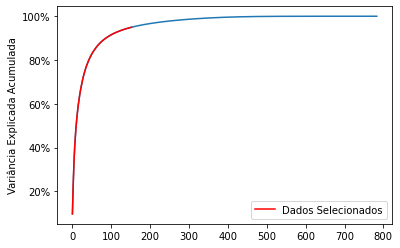

In [51]:
def act_fun(u,fun):

    if fun == "step":
        u[np.where(u >= 0)] = 1
        u[np.where(u < 0)] = 0

    elif fun == "tanh":
        u = np.array(list(map(lambda x: (1-np.exp(-x))/(1+np.exp(-x)), u)))
    
    elif fun == "log":
        u = np.array(list(map(lambda x: 1/(1+np.exp(-x)), u)))
    
    return u 

X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

print("Dimensão da matriz de dados de treino antes do PCA: {}".format(X.shape))
print("Dimensão da matriz de dados de teste antes do PCA: {}".format(X_test.shape))
#A base de dados do MNIST é disponibilizada no seguinte padrão nxp
#n é o número de amostras, p o número de característica
#Para aplicação do PCA, deve-se transpor essa matriz para que se torne pxn

X, X_test = PCA(X.T, X_test.T, compress = True, spt_point = 0.95)
print("Dimensão da matriz de dados de treino após PCA (95% da variância): {}".format(X.shape))
print("Dimensão da matriz de dados de teste após PCA (95% da variância): {}\n".format(X_test.shape))

#Transpondo para aproveitar uma implementação desenvolvida durante as aulas da disciplina
X, Y = (X.T, Y.T)
X_test, Y_test = (X_test.T, Y_test.T)

fun_type = "log"

Nr = 5
q = 86
tx_ok = np.empty(Nr)
W = np.random.normal(loc = 0, scale = 0.1, size = (q, X.shape[0]+1))

tic = time.perf_counter()
for r in range(Nr):

    rand_index = np.random.permutation(X.shape[1])

    X = X[:,rand_index]
    Y = Y[:,rand_index]

    Z = []

    for i in range(X.shape[1]):
        x = np.append(-1, X[:,i])
        U1 = np.dot(W, x)
        z = act_fun(U1, fun_type)
        z = np.append(-1, z)
        Z.append(z)

    Z = np.array(Z)
    
    tic2 = time.perf_counter()
    
    M = np.dot(Y, np.linalg.pinv(Z.T))
    
    count = 0

    for j in range(X_test.shape[1]):
        x = np.append(-1, X_test[:,j])
        U1 = np.dot(W,x)
        z = act_fun(U1, fun_type)
        z = np.append(-1, z)
        y = np.dot(M, z)

        if Y_test[:,j].argmax() == y.argmax():
            count += 1
    tx_ok[r] = count/X_test.shape[1]
    print("Rodada {}, Taxa de acerto {:.2%}".format(r+1, count/X_test.shape[1]))
toc = time.perf_counter()

print("\nTaxa de acerto Média = {:.2%}".format(tx_ok.mean()))
print("Taxa de erro Média = {:.2%}".format(1-tx_ok.mean()))
print("Melhor Taxa de Acerto = {:.2%}".format(tx_ok.max()))
print("Pior Taxa de Acerto = {:.2%}".format(tx_ok.min()))
print("Desv. Pad. Taxa de Acerto = {:.2%}".format(tx_ok.std()))

print("\nTempo de Calibração e Validação para {} rodadas = {} segundos".format(Nr, round(toc-tic, 2)))

<div class="alert alert-block alert-warning">
S2
</div>

<div class="alert alert-block alert-info">
S2
</div>

<div class="alert alert-block alert-success">
S2
</div>

<div class="alert alert-block alert-danger">
S2
</div>